In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==1]
df.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
0,2017-01-04 00:00:00,2452.453706,947.170207,0.450666,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
1,2017-01-04 01:00:00,2722.733293,1142.593908,1.377337,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
2,2017-01-04 02:00:00,2875.868294,1325.265793,3.915958,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
3,2017-01-04 03:00:00,2803.582630,1279.729428,0.084493,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
4,2017-01-04 04:00:00,2465.531768,922.310425,0.155445,1,1,0,3931.024433,3778.895815,0,0,0,0,0,1,0


In [6]:
df=df.drop(columns=['sub_meter_1','sub_meter_2','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,main_meter
timestamp,
2017-01-04 00:00:00,2452.453706
2017-01-04 01:00:00,2722.733293
2017-01-04 02:00:00,2875.868294
2017-01-04 03:00:00,2803.582630
2017-01-04 04:00:00,2465.531768


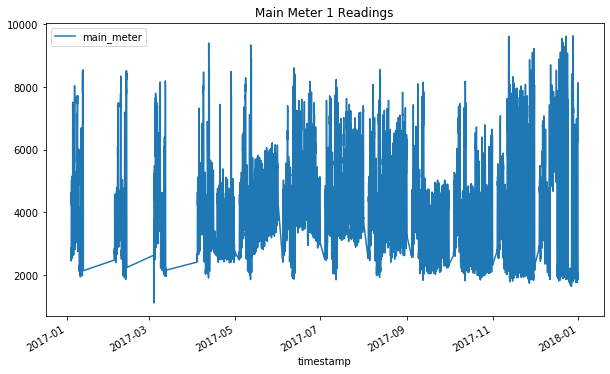

In [7]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

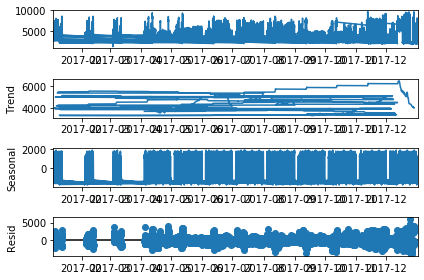

In [8]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [9]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Fit ARIMA: order=(1, 1, 1); AIC=107002.997, BIC=107030.175, Fit time=0.843 seconds
Fit ARIMA: order=(0, 1, 0); AIC=107199.624, BIC=107213.214, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=107001.769, BIC=107022.153, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1); AIC=107005.632, BIC=107026.016, Fit time=0.024 seconds
Fit ARIMA: order=(2, 1, 0); AIC=107002.565, BIC=107029.743, Fit time=0.046 seconds
Fit ARIMA: order=(2, 1, 1); AIC=106420.839, BIC=106454.813, Fit time=1.903 seconds
Fit ARIMA: order=(3, 1, 1); AIC=106376.814, BIC=106417.583, Fit time=2.947 seconds
Fit ARIMA: order=(3, 1, 0); AIC=106989.368, BIC=107023.341, Fit time=0.064 seconds
Fit ARIMA: order=(3, 1, 2); AIC=106062.024, BIC=106109.587, Fit time=3.916 seconds
Fit ARIMA: order=(4, 1, 3); AIC=105769.919, BIC=105831.071, Fit time=4.637 seconds
Fit ARIMA: order=(3, 1, 3); AIC=105825.732, BIC=105880.089, Fit time=6.780 seconds
Fit ARIMA: order=(5, 1, 3); AIC=105556.405, BIC=105624.352, Fit time=7.152 seconds
Fit 

In [10]:
train = df.loc['01-04-2017 00:00:00':'7-11-2017 00:00:00']
test = df.loc['7-11-2017 00:00:00']
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [11]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast,

(array([2299.69747708, 2286.88031158, 2852.91905929, ..., 4145.97008498,
        3761.35129764, 3371.71265681]),)

In [12]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb1m1.csv')

In [13]:
df7=pd.read_csv('C:/Users/Ankan/Downloads/updatedb1m1.csv')

In [14]:
df7.head()

,Unnamed: 0,0
0,0,2299.697477
1,1,2286.880312
2,2,2852.919059
3,3,3335.460553
4,4,4241.350822


In [15]:
ne=np.repeat(df7['0'],4)
ne.to_csv('latest_train_b1m1.csv')